# **Big Sales Prediction using Random Forest   Regressor**

-------------

# Get understanding about Dataset


1. Item_Identifier

2. Item_weight

3. Item_fat_content

4. Item_visibility

5. Item_type

6. Item_MRP

7. outlet_identifier

8. Outlet_Establishment_year

9. Outlet_size

10. Outlet_location_Type

11. Outlet_type

12. Item_outlet_sales


# Import Library

In [1]:
import pandas as pd

C:\Users\91992\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import numpy as np

## Import csv or dataframe

In [5]:
df = pd.read_csv('Big Sales Data.csv')

# Get the first five rows of dataframe

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


# Get information of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Get columns names

In [11]:
df.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

#  Get the summary statistics

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [ ]:
df['Item_Weight'].fillna(df.groupby(['Item_type'])['Item_weight'].transform('mean'),inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

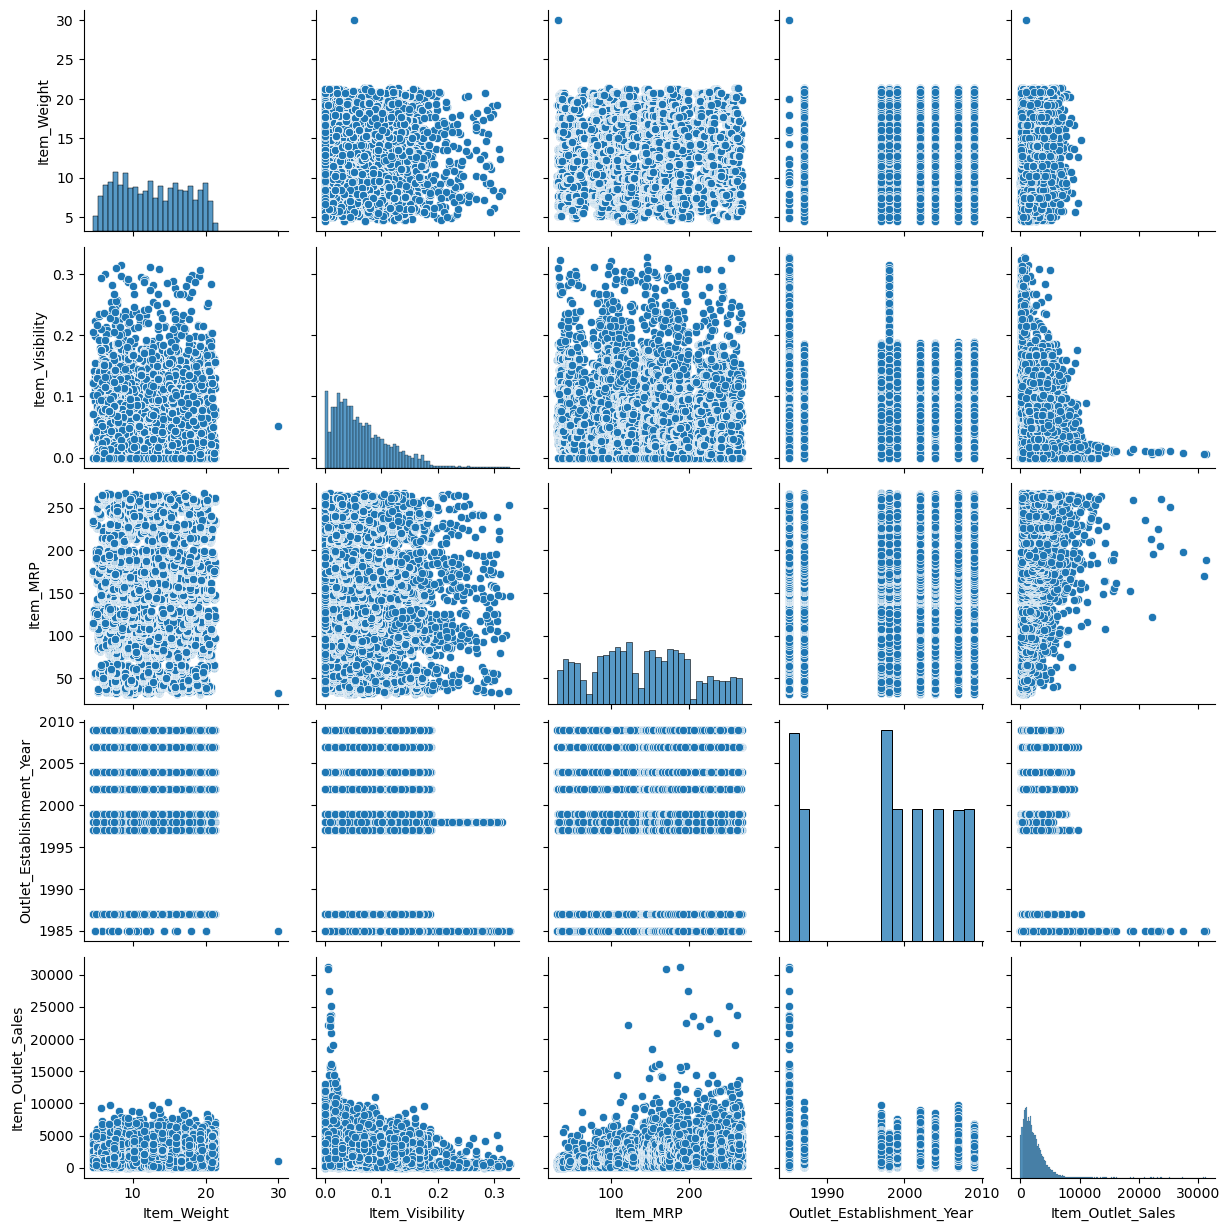

In [17]:
import seaborn as sns
sns.pairplot(df)

# Get Categories and counts of categorical variables

In [18]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Name: count, Length: 1559, dtype: int64

In [20]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
Name: count, dtype: int64

In [25]:
df.replace({'Item_Fat_Content' : {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [26]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
Name: count, dtype: int64

In [ ]:
df.replace({'Item_Fat_Content':{'Low Fat': 0,'Regular': 1}},inplace=True)

In [27]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [40]:
df.replace({'Item_Type':{'Snack Foods':0,'Household':1,
                        'Frozen Foods':0,'Dairy':0,'Baking Goods': 0,
                        'Canned':0,'Health and Hygiene':1,'Meat':0,
                        'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Others':2,
                        'Starchy Foods':0,'Breakfast':0,'Seafood': 0}},inplace=True)

In [44]:
df.replace({'Item_Type':{'Fruits and Vegetables':0}},inplace=True)

In [45]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
Name: count, dtype: int64

In [46]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
Name: count, dtype: int64

In [50]:
df.replace({'Outlet_Identifier':{'OUT027': 0, 'OUT013': 1,'OUT049': 2, 'OUT046': 3, 'OUT035': 4, 'OUT045': 5, 'OUT018': 6, 'OUT017': 7, 'OUT010': 8, 'OUT019': 9 }},inplace=True)

C:\Users\91992\AppData\Local\Temp\ipykernel_8420\3549869411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Identifier':{'OUT027': 0, 'OUT013': 1,'OUT049': 2, 'OUT046': 3, 'OUT035': 4, 'OUT045': 5, 'OUT018': 6, 'OUT017': 7, 'OUT010': 8, 'OUT019': 9 }},inplace=True)


In [51]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
Name: count, dtype: int64

In [54]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
Name: count, dtype: int64

In [55]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)

C:\Users\91992\AppData\Local\Temp\ipykernel_8420\2280767512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)


In [56]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
Name: count, dtype: int64

In [58]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
Name: count, dtype: int64

In [66]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)

In [67]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
Name: count, dtype: int64

In [69]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [71]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,
                          'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)

C:\Users\91992\AppData\Local\Temp\ipykernel_8420\580322269.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,


In [72]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
Name: count, dtype: int64

In [73]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,0,33.4874,2,1999,1,0,1,436.608721
1,FDT36,12.3,Low Fat,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,Low Fat,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,Low Fat,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,Regular,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.3+ MB


#  Get shape of DataFrame

In [76]:
df.shape

(14204, 12)

# Define y (dependent  or label or target variable) and (independent or feature or attribute variable)

In [80]:
y = df['Item_Outlet_Sales']

In [82]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [86]:
X = df[[
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']]

In [88]:
X.shape

(14204, 10)

In [89]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.3,Low Fat,0.111448,0,33.4874,2,1999,1,0,1
1,12.3,Low Fat,0.111904,0,33.9874,7,2007,1,1,1
2,12.3,Low Fat,0.111728,0,33.9874,6,2009,1,2,2
3,12.3,Low Fat,0.000000,0,34.3874,9,1985,0,0,0
4,9.8,Regular,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.8,Low Fat,0.069606,0,261.9252,4,2004,0,1,1
14200,12.8,Low Fat,0.070013,0,262.8252,7,2007,1,1,1
14201,12.8,Low Fat,0.069561,0,263.0252,1,1987,2,2,1
14202,NaN,Low Fat,0.069282,0,263.5252,0,1985,1,2,3


In [91]:
X.isna().sum()

Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [117]:
X['Item_Weight'] = np.where(X['Item_Weight'].isna(),
                                 X['Item_Weight'].mean(),
                                 X['Item_Weight'])

C:\Users\91992\AppData\Local\Temp\ipykernel_8420\2209532817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Item_Weight'] = np.where(X['Item_Weight'].isna(),


In [100]:
X.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [101]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,Low Fat,0.111448,0,33.4874,2,1999,1,0,1
1,12.300000,Low Fat,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,Low Fat,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,Low Fat,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,Regular,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,Low Fat,0.069606,0,261.9252,4,2004,0,1,1
14200,12.800000,Low Fat,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,Low Fat,0.069561,0,263.0252,1,1987,2,2,1
14202,12.788355,Low Fat,0.069282,0,263.5252,0,1985,1,2,3


# Get X Variables Standardized

Standardization of dataset is a common requirement for many machine learning estimators implemeted in skikit learn they might behave badly if the idividual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance

In [105]:
from sklearn.preprocessing import StandardScaler

In [107]:
sc = StandardScaler()

In [109]:
X_std = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [111]:
X_std = sc.fit_transform(X_std)

In [112]:
X_std

array([[-0.10493402,  0.88413635, -1.73178716,  0.13968068],
       [-0.10493402,  0.89300616, -1.72373366,  1.09531886],
       [-0.10493402,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00250208,  0.07011952,  1.96538148, -1.29377659],
       [        nan,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00250208,  0.07334891,  1.97504569,  0.13968068]])

In [114]:
X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = pd.DataFrame(X_std,
                                                                                          columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

C:\Users\91992\AppData\Local\Temp\ipykernel_8420\159340729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = pd.DataFrame(X_std,


In [118]:
X.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [119]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.049340e-01,Low Fat,0.884136,0,-1.731787,2,0.139681,1,0,1
1,-1.049340e-01,Low Fat,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-1.049340e-01,Low Fat,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-1.049340e-01,Low Fat,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-6.421145e-01,Regular,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,2.502084e-03,Low Fat,0.070990,0,1.947664,4,0.736955,0,1,1
14200,2.502084e-03,Low Fat,0.078898,0,1.962160,7,1.095319,1,1,1
14201,2.502084e-03,Low Fat,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,-2.646118e-17,Low Fat,0.064694,0,1.973435,0,-1.532686,1,2,3


In [134]:
X['Item_Fat_Content'] = np.where(X['Item_Fat_Content'] == 'Low Fat',
                                 0,
                                 1)

C:\Users\91992\AppData\Local\Temp\ipykernel_8420\1450171053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Item_Fat_Content'] = np.where(X['Item_Fat_Content'] == 'Low Fat',


# Get train test split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state = 2529)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

#  Get model train

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rfr = RandomForestRegressor(random_state=2529)

In [140]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2529)

#  Get model prediction

In [141]:
y_pred = rfr.predict(X_test)

In [142]:
y_pred

array([1490.06897173,  855.49340764, 1863.44354104, ..., 2203.51227972,
       3221.23521749,  400.31123831])

#  Get model evaluation

In [144]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [145]:
mean_squared_error(y_test,y_pred)

1603516.1736882355

In [147]:
mean_absolute_error(y_test,y_pred)

818.0710192315348

In [148]:
r2_score(y_test,y_pred)

0.5826285477920276

# Get Visualization of actual vs predicted results

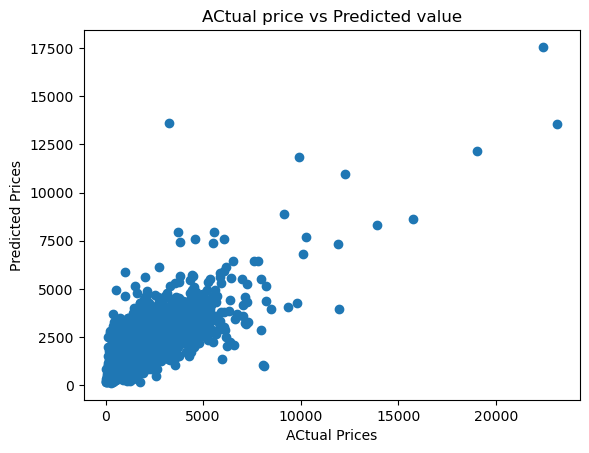

In [150]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("ACtual Prices")
plt.ylabel("Predicted Prices")
plt.title("ACtual price vs Predicted value")
plt.show()

Step 1: Data Preparation
Load Dataset:

Check for Missing Values:

Convert Categorical Columns to Numeric:

Encode Item_Fat_Content to have consistent values (Low Fat = 0, Regular = 1).

Encode other categorical features (Item_Type, Outlet_Identifier, etc.) with numerical values.
Verify Data Types and Shape:


Step 2: Feature Selection

Define Target (y) and Features (X):

Train-Test Split:

Step 3: Model Training and Evaluation

Train Random Forest Regressor:

Predict on Test Data:

Evaluate Model: